<a href="https://colab.research.google.com/github/catnipglitch/google-colab-notebooks/blob/main/openai/OpenAI_ImageGeneration_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このノートブックでは、OpenAIのGPT-Image-1モデルを使って、日本語で記述したプロンプトからイラストを生成できます。

# 準備:

OpenAI APIキーの設定:
まず、OpenAIのウェブサイトでAPIキーを取得してください。
取得したAPIキーを、Google Colabのユーザーデータに OPENAI_API_KEY という名前で保存します。

# プロンプトのカスタマイズ:

ノートブック内の prompt 変数に、生成したいイラストの詳細な説明を日本語で記述してください。
プロンプトを具体的に記述することで、よりイメージに近いイラストが生成されます。
例えば、キャラクターの服装、髪型、表情、背景などを細かく指定できます。
画像設定の変更:

img_size, img_quality, img_background 変数で、画像のサイズ、品質、背景を変更できます。
必要に応じて、これらの変数の値を調整してください。
# 実行:

上記の設定が完了したら、ノートブックのセルを順番に実行してください。
しばらくすると、生成されたイラストが表示されます。
# 注意事項:

OpenAI APIの利用には料金が発生します。。
プロンプトの内容によっては、意図したイラストが生成されない場合があります。
より詳細な設定や使い方については、OpenAIのドキュメントを参照してください。


In [ ]:
!pip install openai

画像が生成されたのだ！表示するのだ～！


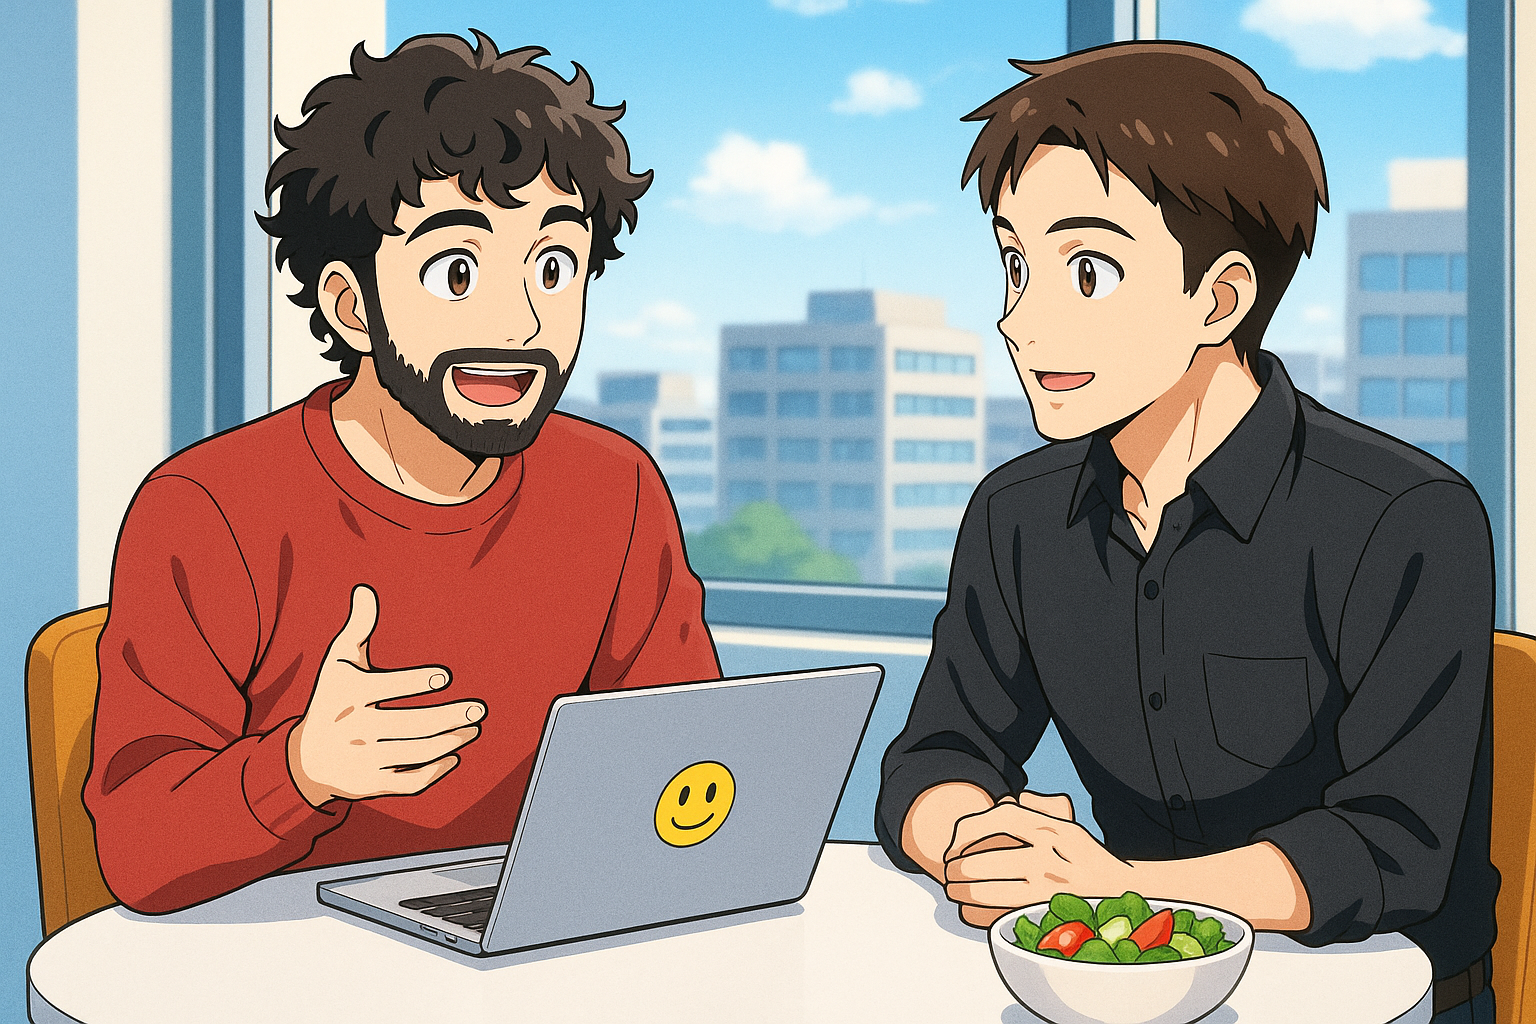

In [ ]:
import os
import base64
from openai import OpenAI
from google.colab import userdata
from IPython.display import Image, display

# Google ColabでAPIキーを安全に取得するのだ！
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

prompt = "Create an illustration in the style of Japanese anime, featuring two men sitting at a white round table. The man on the left, who has curly dark hair, a beard, and is wearing a red sweater, is using a laptop with a smiley face sticker and explaining something with a positive expression. The man on the right, who has short brown hair and is wearing a black button-down shirt, is listening attentively with a friendly and interested expression. On the table is also a bowl of salad. The background includes a window with a view of a city. Use bright and vibrant colors with sharp lines, typical of anime art style." # @param {type:"string"}
img_size = '1536x1024' # @param ["1024x1024", "1536x1024", "1024x1536"]
img_quality = 'high' # @param ["high", "medium","low"]
img_background = 'opaque' # @param ["transparent", "opaque"]



try:
  # GPT-Image-1で画像生成を試すのだ！
  response = client.images.generate(
    model="gpt-image-1",
    prompt=prompt,
    n=1,
    size=img_size,
    background=img_background,
    quality=img_quality
  )

  # レスポンスを確認して画像を表示するのだ！
  image_data = response.data[0].b64_json
  image_bytes = base64.b64decode(image_data)
  print("画像が生成されたのだ！表示するのだ～！")
  display(Image(data=image_bytes))

except Exception as e:
  print(f"画像生成でエラーが起きてしまったのだ: {e}")